In [49]:
import pystan as stan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

sns.set()

In [53]:
coin_flip_stan = """
data {
    int<lower=0> n_tosses;
    int<lower=0> n_heads;
}
transformed data {}
parameters {
    real<lower=0, upper=1> p;
}
transformed parameters {}
model {
    p ~ beta(10, 10);
    n_heads ~ binomial(n_tosses, p);
}
generated quantities {}
"""

In [54]:
%%time
model = stan.StanModel(model_code=coin_flip_stan, model_name='coin_flip')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL coin_flip_7bc0da91f4354b7dafd70834fae2acf6 NOW.


CPU times: user 2.2 s, sys: 163 ms, total: 2.36 s
Wall time: 1min 8s


In [55]:
coin_data = {
    'n_tosses': 100,
    'n_heads': 61,
}
fit = model.sampling(data=coin_data)
fit

Inference for Stan model: coin_flip_7bc0da91f4354b7dafd70834fae2acf6.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p      0.59  1.3e-3   0.05    0.5   0.56   0.59   0.62   0.68   1323    1.0
lp__ -81.69    0.02   0.73 -83.76 -81.89 -81.39 -81.21 -81.15   1975    1.0

Samples were drawn using NUTS at Sun Sep 23 15:21:01 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

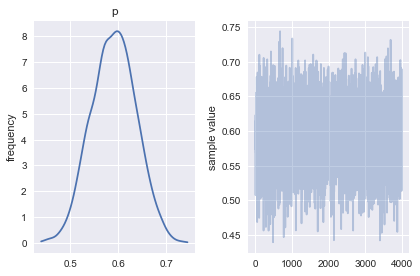

In [56]:
_ = fit.plot('p')
plt.tight_layout()

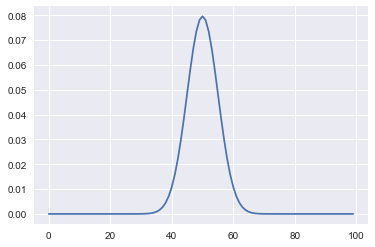

In [63]:
x = list(range(0, 100))
y = ss.binom.pmf(x, 100, 0.5)
plt.plot(x, y)